In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Reshape, BatchNormalization, Conv2DTranspose, Activation, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers
from datetime import datetime
from tensorflow.keras.losses import binary_crossentropy, BinaryCrossentropy
from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [60]:
img_rows = 28
img_cols = 28
channels = 1

img_shape = (img_rows, img_cols, channels)
z_dim = 128

iterations = 10000
batch_size = 128
sample_interval = 500
num_epochs = 40

In [66]:
def build_generator(z_dim):
    rand_img = Input(shape=(z_dim,),name='gen_input')
    x = Dense(7*7*128,name='gen_dense1')(rand_img)
    x = Reshape((7,7,128),name='gen_reshape1')(x)
    x = Conv2DTranspose(64,kernel_size=5,strides=2,padding='same',activation='selu',name='gen_conv1')(x)
    x = BatchNormalization(name='gen_bn1')(x)
    x = Conv2DTranspose(32,kernel_size=5,strides=1,padding='same',activation='selu',name='gen_conv2')(x)
    x = BatchNormalization(name='gen_bn2')(x)
    output = Conv2DTranspose(1,kernel_size=5,strides=2,padding='same',activation='tanh',name='gen_conv3')(x)
    
    model = Model(rand_img,output,name='generator')

    return model

In [84]:
def build_discriminator(img_shape):
    img_input = Input(shape=img_shape,name='disc_input')
    x = Conv2D(32,kernel_size=5,strides=2,padding='same',name='disc_conv1')(img_input)
    x = LeakyReLU(alpha=0.2,name='disc_lrelu1')(x)
    x = Dropout(0.4)(x)
    x = Conv2D(64,kernel_size=5,strides=2,padding='same',name='disc_conv2')(x)
    x = LeakyReLU(alpha=0.2,name='disc_lrelu2')(x)
    x = Dropout(0.4)(x)
    x = Conv2D(128,kernel_size=5,strides=2,padding='same',name='disc_conv3')(x)
    x = LeakyReLU(alpha=0.2,name='disc_lrelu3')(x)
    x = Dropout(0.4)(x)
    x = Flatten()(x)
    output = Dense(1,activation='sigmoid')(x)

    model = Model(img_input,output,name='discriminator')
    opt = optimizers.Adam(learning_rate=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model


In [87]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    x = Sequential(name="gan")
    x.add(generator)
    x.add(discriminator)
    opt = optimizers.Adam(learning_rate=0.0005)
    x.compile(loss='binary_crossentropy', optimizer=opt)

    return x


In [69]:
def sample_generator(generator,grid_row=4,grid_col=4):
    z = np.random.normal(0,1,(grid_row*grid_col,z_dim))
    gen_imgs = generator.predict(z)
    gen_imgs = 0.5 + 0.5 * gen_imgs

    fig, axs = plt.subplots(grid_row,
                            grid_col,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in np.arange(grid_row):
        for j in np.arange(grid_col):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    
    plt.show()

In [88]:
discriminator = build_discriminator(img_shape)
generator = build_generator(z_dim)
generator.summary()
discriminator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gen_input (InputLayer)       [(None, 128)]             0         
_________________________________________________________________
gen_dense1 (Dense)           (None, 6272)              809088    
_________________________________________________________________
gen_reshape1 (Reshape)       (None, 7, 7, 128)         0         
_________________________________________________________________
gen_conv1 (Conv2DTranspose)  (None, 14, 14, 64)        204864    
_________________________________________________________________
gen_bn1 (BatchNormalization) (None, 14, 14, 64)        256       
_________________________________________________________________
gen_conv2 (Conv2DTranspose)  (None, 14, 14, 32)        51232     
_________________________________________________________________
gen_bn2 (BatchNormalization) (None, 14, 14, 32)        12

In [90]:
gan = build_gan(generator,discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

gan.summary()

Model: "gan"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator (Functional)       (None, 28, 28, 1)         1066369   
_________________________________________________________________
discriminator (Functional)   (None, 1)                 259073    
Total params: 1,325,442
Trainable params: 1,066,177
Non-trainable params: 259,265
_________________________________________________________________


500 [D loss: 0.7257922887802124, acc.: 44.921875] [G loss: 0.8424912691116333]


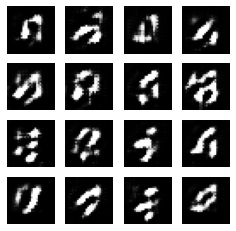

1000 [D loss: 0.6418314576148987, acc.: 68.359375] [G loss: 0.8532196283340454]


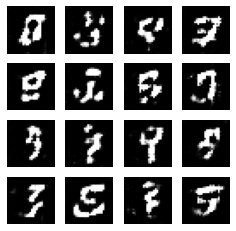

1500 [D loss: 0.6508878469467163, acc.: 60.546875] [G loss: 0.8583313226699829]


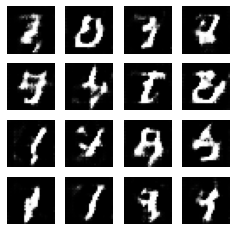

2000 [D loss: 0.6062414646148682, acc.: 68.359375] [G loss: 0.8971788883209229]


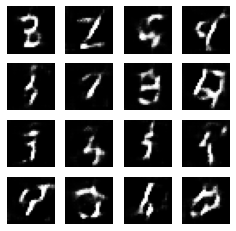

2500 [D loss: 0.6395747661590576, acc.: 64.453125] [G loss: 0.815253496170044]


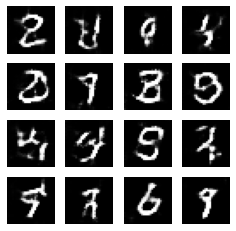

3000 [D loss: 0.6705212593078613, acc.: 58.59375] [G loss: 0.7639496326446533]


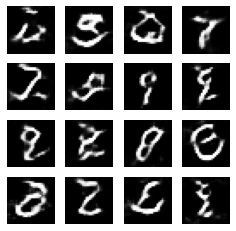

3500 [D loss: 0.6259884238243103, acc.: 63.671875] [G loss: 0.8261576890945435]


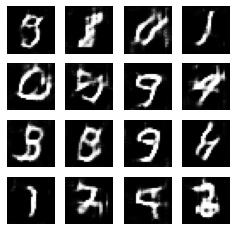

4000 [D loss: 0.6416745185852051, acc.: 64.0625] [G loss: 0.864231526851654]


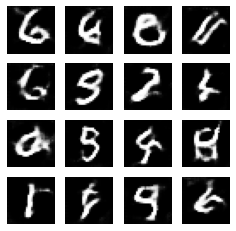

4500 [D loss: 0.6758238673210144, acc.: 57.03125] [G loss: 0.8086385130882263]


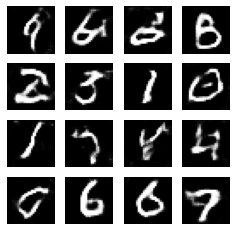

5000 [D loss: 0.670899897813797, acc.: 58.59375] [G loss: 0.7929631471633911]


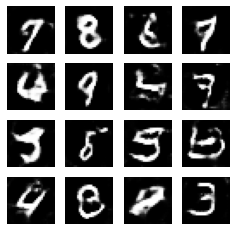

5500 [D loss: 0.6498452126979828, acc.: 62.5] [G loss: 0.864029586315155]


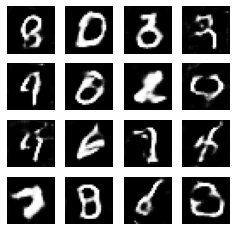

6000 [D loss: 0.6797294318675995, acc.: 59.375] [G loss: 0.7533738017082214]


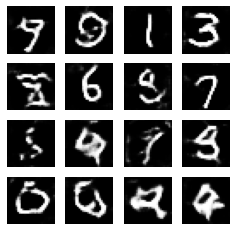

6500 [D loss: 0.6654725670814514, acc.: 60.15625] [G loss: 0.7778517007827759]


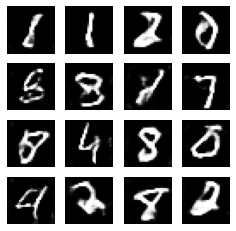

7000 [D loss: 0.6700133979320526, acc.: 59.375] [G loss: 0.8439785242080688]


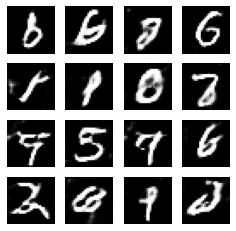

7500 [D loss: 0.6523528397083282, acc.: 61.71875] [G loss: 0.8008742332458496]


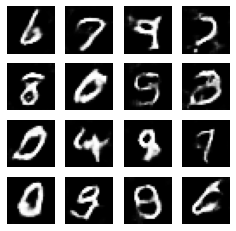

8000 [D loss: 0.653965562582016, acc.: 60.15625] [G loss: 0.7618130445480347]


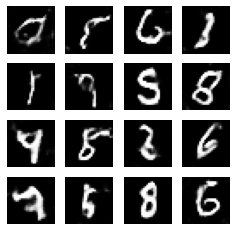

8500 [D loss: 0.6764954030513763, acc.: 57.421875] [G loss: 0.807418167591095]


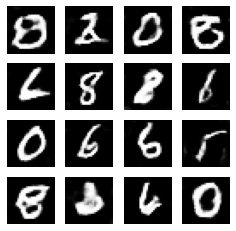

9000 [D loss: 0.6839704215526581, acc.: 59.375] [G loss: 0.7972025871276855]


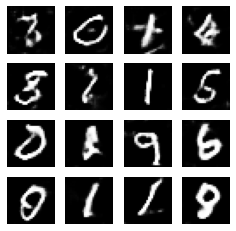

9500 [D loss: 0.6773599684238434, acc.: 58.203125] [G loss: 0.7897247672080994]


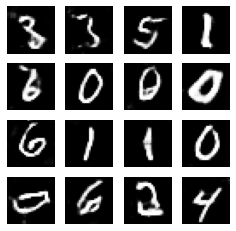

10000 [D loss: 0.65734001994133, acc.: 62.5] [G loss: 0.8113192319869995]


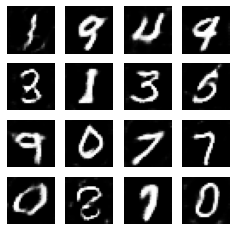

In [91]:
losses = []
accuracies = []
iter_check = []

(x_train,y_train),(_,_) = mnist.load_data()
x_train = (1.0/127.5)*x_train - 1.0
x_train = np.expand_dims(x_train,axis=3)    

real = np.ones((batch_size,1))
fake = np.zeros((batch_size,1))

for iter in np.arange(iterations):
    idx = np.random.randint(0,x_train.shape[0],batch_size)
    real_imgs = x_train[idx]

    z = np.random.normal(0,1,(batch_size,z_dim))
    gen_imgs = generator.predict(z)

    #discriminator.trainable = True
    d_loss_real = discriminator.train_on_batch(real_imgs,real)
    d_loss_fake = discriminator.train_on_batch(gen_imgs,fake)
    d_loss,accuracy = 0.5 * np.add(d_loss_real,d_loss_fake)

    z = np.random.normal(0,1,(batch_size,z_dim))
    #gen_imgs = generator.predict(z)
    
    g_loss = gan.train_on_batch(z,real)

    if (iter + 1) % sample_interval == 0:
        losses.append((d_loss,g_loss))
        accuracies.append(100.0 * accuracy)
        iter_check.append(iter + 1)
        print(f"{iter + 1} [D loss: {d_loss}, acc.: {100.0 * accuracy}] [G loss: {g_loss}]")

        sample_generator(generator)